In [8]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import utility as u

# Acquire

* Data has been acquired from Kaggle at https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
* The data set contained 319,795 observations and 18 features before cleaning
* Each observation represents one person in the study
* Each feature represents an aspect of each person's health

In [9]:
df = pd.read_csv('heart_2020_cleaned.csv')

# Prepare

* There were no null values in this data set
* Features were renamed for convention and readability
* Data was split into train, validate, and test dataframes
* Outliers for bmi and sleep_time will be removed using the inner quartile rule (k = 3)
* Dummy variables were created for catagorical features for use in modeling
* Scaled versions of numeric variables were added to the dataframe for use in modeling

In [10]:
df = df.rename(columns={'HeartDisease':'has_heart_disease', 
                        'BMI':'bmi', 
                        'Smoking':'is_smoker', 
                        'AlcoholDrinking':'is_heavy_drinker',
                        'Stroke':'stroke',
                        'PhysicalHealth':'poor_physical_health_days', 
                        'MentalHealth':'poor_mental_health_days', 
                        'DiffWalking': 'has_difficulty_walking', 
                        'Sex':'sex', 
                        'AgeCategory':'age_category',
                        'Race':'race', 
                        'Diabetic':'diabetic', 
                        'PhysicalActivity':'physical_activity', 
                        'GenHealth':'general_health', 
                        'SleepTime':'sleep_time',
                        'Asthma':'asthma', 
                        'KidneyDisease':'kidney_disease', 
                        'SkinCancer':'skin_cancer'})

In [13]:
def split_my_data(df):
    '''Splits data and returns a train, validate, and test dataframe'''

    # split df into train_validate and test
    train_validate, test = train_test_split(df, 
                                            test_size=.2, 
                                            random_state=123, 
                                            stratify=df.has_heart_disease)

    # split train_validate into train and validate
    train, validate =  train_test_split(train_validate, 
                                        test_size=.3, 
                                        random_state=123, 
                                        stratify=train_validate.has_heart_disease)

    # reset index for train validate and test
    train.reset_index(drop=True, inplace=True)
    validate.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    return train, validate, test

In [14]:
train, validate, test = split_my_data(df)

In [15]:
train

,has_heart_disease,bmi,is_smoker,is_heavy_drinker,stroke,poor_physical_health_days,poor_mental_health_days,has_difficulty_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,21.93,No,No,No,0.0,10.0,No,Male,25-29,Black,No,Yes,Excellent,6.0,No,No,No
1,No,31.19,No,No,No,0.0,0.0,No,Male,65-69,White,No,No,Very good,6.0,No,No,No
2,Yes,19.49,Yes,No,No,30.0,0.0,Yes,Female,60-64,White,No,No,Fair,6.0,Yes,No,No
3,No,23.56,No,No,No,6.0,0.0,No,Female,65-69,Hispanic,Yes,No,Poor,8.0,No,No,No
4,No,20.53,No,No,No,2.0,2.0,No,Female,75-79,White,No,Yes,Very good,9.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179080,No,33.84,Yes,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Good,8.0,No,No,No
179081,No,25.39,No,No,No,0.0,0.0,No,Female,65-69,White,No,Yes,Good,8.0,No,No,No
179082,No,22.15,Yes,No,No,0.0,1.0,No,Female,30-34,White,No,Yes,Excellent,7.0,No,No,No
179083,No,27.41,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Very good,7.0,No,No,No


In [16]:
validate

,has_heart_disease,bmi,is_smoker,is_heavy_drinker,stroke,poor_physical_health_days,poor_mental_health_days,has_difficulty_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,25.11,No,No,No,0.0,0.0,No,Male,70-74,Black,No,Yes,Good,12.0,No,No,No
1,No,20.83,No,No,No,1.0,1.0,No,Female,30-34,White,No,Yes,Very good,6.0,No,No,No
2,No,35.26,Yes,No,No,0.0,0.0,Yes,Male,65-69,White,Yes,No,Fair,8.0,No,No,Yes
3,No,29.53,No,No,No,0.0,0.0,No,Female,40-44,Black,No,Yes,Good,8.0,No,No,No
4,No,27.46,Yes,Yes,No,0.0,30.0,No,Female,18-24,White,No,Yes,Very good,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76746,No,21.29,No,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Excellent,8.0,No,No,No
76747,No,23.41,Yes,Yes,No,0.0,15.0,No,Female,55-59,White,No,Yes,Good,9.0,No,No,No
76748,No,31.93,No,No,No,0.0,8.0,No,Female,60-64,White,No,Yes,Good,7.0,No,No,No
76749,No,31.01,Yes,No,No,0.0,0.0,No,Male,50-54,Hispanic,No,Yes,Excellent,7.0,No,No,No


In [17]:
test

,has_heart_disease,bmi,is_smoker,is_heavy_drinker,stroke,poor_physical_health_days,poor_mental_health_days,has_difficulty_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer
0,Yes,25.83,Yes,No,No,21.0,0.0,No,Male,75-79,White,Yes,Yes,Fair,8.0,No,Yes,Yes
1,No,18.65,Yes,No,No,0.0,0.0,No,Male,55-59,White,No,Yes,Very good,7.0,Yes,No,No
2,No,28.43,No,No,No,0.0,1.0,No,Male,80 or older,White,Yes,Yes,Good,7.0,No,No,No
3,No,31.38,No,No,No,0.0,0.0,Yes,Male,70-74,White,No,No,Fair,8.0,No,No,Yes
4,No,25.69,No,No,No,0.0,5.0,No,Female,45-49,White,No,Yes,Excellent,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63954,No,25.06,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Excellent,7.0,No,No,Yes
63955,No,23.67,Yes,No,No,0.0,5.0,No,Male,55-59,Hispanic,No,Yes,Very good,7.0,No,No,No
63956,No,21.29,No,No,No,30.0,0.0,No,Male,60-64,White,No,Yes,Excellent,8.0,No,No,No
63957,No,29.95,No,No,No,0.0,7.0,No,Female,18-24,Hispanic,No,Yes,Excellent,5.0,No,No,No


<AxesSubplot:>

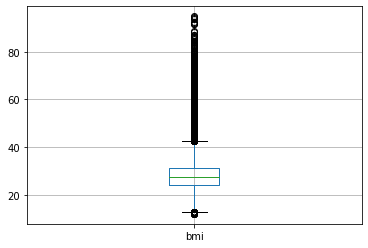

In [29]:
df.boxplot('bmi')

array([[<AxesSubplot:title={'center':'bmi'}>]], dtype=object)

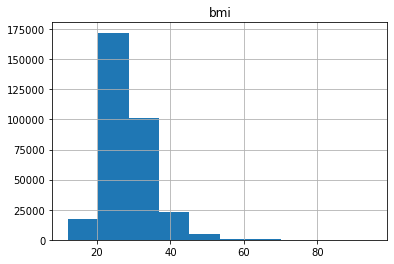

In [32]:
df.hist('bmi')

In [6]:
u.remove_outliers(df, ['bmi','sleep_time'])

,has_heart_disease,bmi,is_smoker,heavy_drinker,stroke,poor_physical_health_days,poor_mental_health_days,has_difficulty_walking,sex,age_category,race,diabetic,physical_activity,general_health,sleep_time,asthma,kidney_disease,skin_cancer
1688,Yes,12.48,Yes,No,Yes,12.0,2.0,No,Male,50-54,Black,No,No,Fair,12.0,No,Yes,No
5037,No,12.75,Yes,Yes,No,0.0,0.0,No,Male,18-24,White,No,Yes,Excellent,5.0,No,No,No
6247,No,13.87,No,Yes,No,0.0,0.0,No,Male,70-74,White,No,No,Very good,8.0,No,No,No
8471,No,13.72,Yes,No,No,10.0,30.0,Yes,Female,75-79,White,No,No,Good,8.0,No,No,No
10356,No,13.31,Yes,No,No,1.0,15.0,Yes,Female,50-54,White,No,No,Fair,2.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292711,No,12.48,Yes,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,No
306969,No,13.35,No,No,No,10.0,7.0,No,Female,25-29,White,No,Yes,Good,5.0,No,No,No
309940,No,12.75,Yes,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Fair,8.0,No,No,No
311320,No,13.38,No,No,No,30.0,0.0,Yes,Female,60-64,White,No,Yes,Good,9.0,Yes,No,Yes


In [ ]:
pd.get_dummies(df[['has_heart_disease']],index=False)

In [ ]:
df.columns

In [23]:
len(df.has_heart_disease[df.has_heart_disease=="Yes"])/len(df.has_heart_disease)

0.08559545959130067